In [32]:
# Блок 1: Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, ShuffleSplit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer


In [33]:
# Блок 2: Загрузка данных
data = pd.read_excel('ус 90-10.xlsx')
df = pd.DataFrame(data)

print(df.columns.tolist())

['Yс', 'х1', 'х2', 'х3', 'х4', 'х5', 'х6', 'х7', 'х8', 'х9', 'х10']


In [34]:
# Блок 3: Определение входных и выходных данных
X = df[['х1', 'х2', 'х3', 'х4', 'х5', 'х6', 'х7', 'х8', 'х9', 'х10']]
y = df['Yс']

print(X, y)

     х1    х2    х3         х4    х5       х6   х7    х8    х9        х10
0   9.4  10.5  4.15  91.631206   8.0  9.90000  256  31.0  0.50  50.831217
1   9.4  11.0  4.20  88.652482   2.0  9.90000  219  32.0  0.80  51.647059
2   8.9  11.9  4.40  91.835206  16.0  9.40000  349  29.0  0.60  49.195726
3   8.7  12.0  4.40  90.229885   0.3  9.20000  412  29.7  0.60  48.578592
4   9.1  10.7  4.00  92.307692   2.0  9.60000  341  29.0  0.58  49.296436
..  ...   ...   ...        ...   ...      ...  ...   ...   ...        ...
85  9.2  10.0  3.90  91.050725   0.1  9.82780  270  28.0  0.87  50.157943
86  9.6  10.5  3.90  92.152778   0.1  9.90015  250  34.8  0.60  51.436392
87  9.5  10.5  4.00  92.912281   0.1  9.60850  380  28.4  0.63  48.735347
88  9.6  11.0  3.90  90.694444   0.1  9.73890  190  30.0  0.99  51.983677
89  9.7  10.0  3.80  92.100000   0.1  9.74770  260  27.6  0.59  50.259357

[90 rows x 10 columns] 0     27
1     26
2     26
3     25
4     27
      ..
85    22
86    26
87    23
88    2

In [35]:
# Блок 4: Разделение данных на обучающую, тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [36]:
# Нормализация данных: приведение всех признаков к одному масштабу
scaler = StandardScaler()  # Создание объекта для нормализации
X_train_scaled = scaler.fit_transform(X_train)  # Обучение и преобразование обучающего набора данных
X_test_scaled = scaler.transform(X_test)  # Преобразование тестового набора данных


In [37]:
param_grid = {
    # Архитектура сети - фокус вокруг (10,)
    'hidden_layer_sizes': [
        (5,), (6,), (7,) # Однослойные архитектуры
    ],
   
    # Оставляем только подтвержденную лучшую функцию активации
    'activation': ['logistic'],
   
    # Оптимизатор adam с уточненными параметрами
    'solver': ['adam'],
    'beta_1': [0.85, 0.9, 0.95],  # Сужаем диапазон вокруг 0.9
    'beta_2': [0.99, 0.998],  # Исследуем область вокруг 0.999
    'epsilon': [1e-6, 1e-4],  # Расширяем диапазон вокруг 1e-8
   
    # Регуляризация - фокус вокруг 0.45
    'alpha': [0.14, 0.17, 0.2],
   
    # Скорость обучения - уточняем вокруг 0.05
    'learning_rate_init': [0.05, 0.07, 0.09],
   
    # Параметры ранней остановки
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 15],  # Исследуем область вокруг 10
    'max_iter': [1000],

   
    # Критерий сходимости
    'tol': [1e-4],  # Оставляем проверенное значение
    # 'early_stopping': [True],
    # 'validation_fraction': [0.05, 0.1, 0.2]
}

# Настройка кросс-валидации
cv = ShuffleSplit(
    n_splits=5,
    test_size=0.25,
    random_state=73
)


grid_search = GridSearchCV(
    estimator=MLPRegressor(random_state=73),
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=2
)


In [38]:
# Блок 6: Обучение GridSearchCV
print("Начинается подбор гиперпараметров...")
grid_search.fit(X_train_scaled, y_train)  # Обучение модели с подбором гиперпараметров

Начинается подбор гиперпараметров...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=73, test_size=0.25, train_size=None),
             estimator=MLPRegressor(random_state=73), n_jobs=-1,
             param_grid={'activation': ['logistic'], 'alpha': [0.14, 0.17, 0.2],
                         'beta_1': [0.85, 0.9, 0.95], 'beta_2': [0.99, 0.998],
                         'early_stopping': [True], 'epsilon': [1e-06, 0.0001],
                         'hidden_layer_sizes': [(5,), (6,), (7,)],
                         'learning_rate_init': [0.05, 0.07, 0.09],
                         'max_iter': [1000], 'n_iter_no_change': [5, 10, 15],
                         'solver': ['adam'], 'tol': [0.0001]},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

In [39]:
# Блок 7: Лучшая модель
best_params = grid_search.best_params_  # Получение лучших гиперпараметров

# Получение модели с лучшими параметрами
best_model = grid_search.best_estimator_

# Прогнозирование на тестовом наборе данных с лучшей моделью
y_pred_best = best_model.predict(X_test_scaled)

In [40]:
# Блок 8: Вычисление метрик
# Вычисление MAPE (Mean Absolute Percentage Error) для оценки точности
mape_best = mean_absolute_percentage_error(y_test, y_pred_best) * 100
# Вычисление RMSE (Root Mean Squared Error) для оценки отклонений предсказаний от реальных значений
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Лучшие параметры:", grid_search.best_params_)
print("Обучающая выборка:")
print(f"MAPE: {-grid_search.best_score_*100} %")
# Вывод лучших метрик
print("Тестовая выборка:")
print(f"MAPE: {mape_best:.4f}%")
print(f"RMSE: {rmse_best:.4f}")

Лучшие параметры: {'activation': 'logistic', 'alpha': 0.17, 'beta_1': 0.9, 'beta_2': 0.998, 'early_stopping': True, 'epsilon': 1e-06, 'hidden_layer_sizes': (6,), 'learning_rate_init': 0.07, 'max_iter': 1000, 'n_iter_no_change': 5, 'solver': 'adam', 'tol': 0.0001}
Обучающая выборка:
MAPE: 8.539443933055672 %
Тестовая выборка:
MAPE: 8.5086%
RMSE: 2.6672


In [44]:
# Блок 9: Создание DataFrame для тестовых значений
# Сравнение истинных значений с предсказанными для тестового набора
test_comparison_model = pd.DataFrame({"yс": y_test.values, "y_pred_best": y_pred_best})
print(test_comparison_model)

    yс  y_pred_best
0   26    23.728790
1   25    23.564777
2   28    23.766396
3   23    23.269034
4   23    23.937556
5   27    24.250969
6   22    24.102218
7   27    24.044655
8   24    23.881104
9   20    21.972788
10  30    24.045507
11  28    24.227784
12  19    22.192789
13  23    22.764923
14  25    23.351756
15  19    18.874823
16  24    22.660774
17  27    23.411088


In [45]:
# Блок 10: Сохранение результатов
# Сохранение результатов и метрик в Excel файл
test_comparison_best = pd.DataFrame({"ус": y_test.values, "y_pred_py": y_pred_best})
metrics_best = pd.DataFrame({"Метрика": ["MAPE", "RMSE"], "Значение": [mape_best, rmse_best]})

# Запись в Excel
output_file = 'models_results_optimized_ус.xlsx'  # Имя выходного файла
with pd.ExcelWriter(output_file) as writer:
    test_comparison_best.to_excel(writer, sheet_name='Результаты лучшей модели', index=False)  # Результаты модели
    metrics_best.to_excel(writer, sheet_name='Метрики лучшей модели', index=False)  # Метрики модели

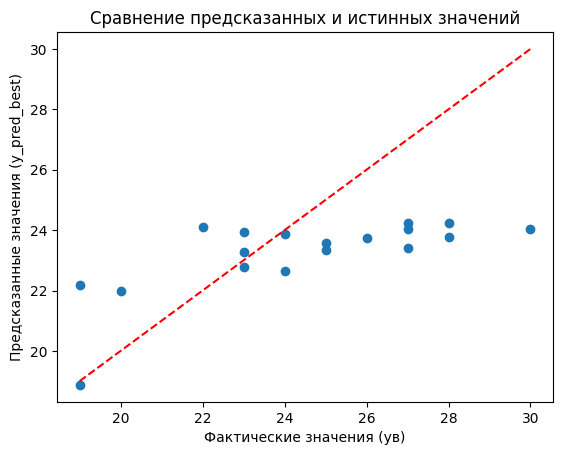

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Создание списков для истинных и предсказанных значений
y_true = y_test.values  # Истинные значения
y_pred = y_pred_best  # Предсказанные значения

# Создание графика точек
plt.scatter(y_true, y_pred)

# Добавление линии идеальных предсказаний (y = x)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')

# Добавление подписей и заголовка
plt.xlabel("Фактические значения (yв)")
plt.ylabel("Предсказанные значения (y_pred_best)")
plt.title("Сравнение предсказанных и истинных значений")

# Показать график
plt.savefig('scatter_plot_yс.png')
